# Workshop 2, Advanced AI - Statistics Module

Student: Ricardo Andrés Cáceres Villibord

Date: 16 de Agosto del 2023 

***Abstract***
- *In this workshop we learn about a) The Central Limit Theore and b) Hypothesis Testing.*

### 2.2 Monte Carlo Simulation

*We have to install the symbulate Python package* (`pip install symbulate`)

In [4]:
from symbulate import *
import matplotlib
import matplotlib.pyplot as plt

### 2.2.1 Simulationg numbers with the UNIFORM probability distribution

We define a uniform random variable X and simulate 10,000 uniform random numbers with values 0 to 40:

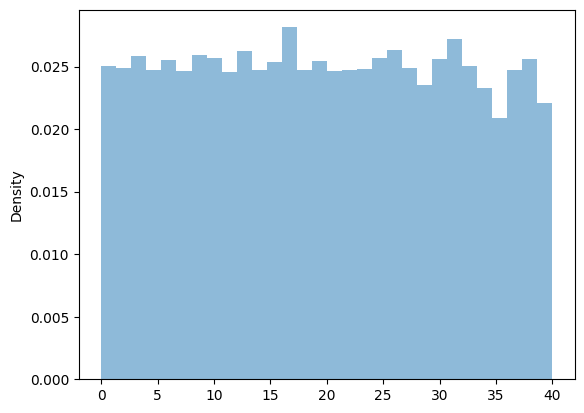

In [5]:
# clear the plot space
plt.clf()
#Define the probability type of funciton as uniform (probability space)
P = Uniform(0,40)
# Define X as a random variable of the type P (uniform)
X = RV(P)
# Simulate the values of X and save them in the x array
x = X.sim(10000)
x.plot()
plt.show()

### 2.2.2 **CHALLENGE**

- a) CALCULATE THE MEAN AND STANDARD DEVIATION OF THIS SIMULATED UNIFORM x VARIABLE. HOW CLOSE WERE THESE MEAN AND STANDARD DEVIATION FROM THE THEORETICAL MEAN AND STANDARD DEVIATION?

In [6]:
# Simulated mean and standard deviation
x_mean = x.mean()
x_std = x.sd()

# Theoretical mean and standard deviation
theoretical_mean = (0 + 40) / 2
theoretical_std = (40 - 0) / sqrt(12)

print("Theoretical Mean: ", theoretical_mean, "\nTheoretical Std: ", theoretical_std )
print("\nMean: ", x_mean, "\nStd: ", x_std)

# Compare simulated and theoretical results
mean_difference = abs(x_mean - theoretical_mean)
std_difference = abs(x_std - theoretical_std)

print("\nDifference in Mean:", mean_difference, "\nDifference in Standard Deviation:", std_difference)

Theoretical Mean:  20.0 
Theoretical Std:  11.547005383792516

Mean:  19.79100583005016 
Std:  11.446228625713406

Difference in Mean: 0.20899416994983966 
Difference in Standard Deviation: 0.10077675807911035


*PODEMOS OBSERVAR VALORES MUY CERCANOS EN EL PROMEDIOL Y LA DESVIACION DE LOS VALORES DE LA SIMULACION CON LOS THEORETICOS*


- b) INTERPET THE ABOVE HISTOGRAM. WHAT DO YOU SEE? EXPLAIN WITH YOUR WORDS.

*EN EL HISTOGRAMA PODEMOS OBSERVAR QUE TODOS LOS VALORES DE LA VARIABLE X (DE 0 A 40) SON TODOS DISTRIBUIDOS DE MANERA UNIFORME, ES DECIR TODOS TIENEN UNA DENSIDAD PARECIDA*


Now generate 10,000 groups of 25 uniform random variables to end up in a matrix of 10,000 rows and 25 columns:

In [7]:
# Define the probability space as a vector of 25 uniform random numnbers:
P = Uniform(0,40) ** 25
# Define XVECTOR as a vector of random variables with 25 random vaalues
XVECTOR = RV(P)
# Simulate 10,000 vectors to get a matrix
xmatrix = XVECTOR.sim(10000)

Now the matrix will have 10,000 rows and 25 columns of uniform random numbers between 0 and 40:

In [8]:
xmatrix

0,"(34.351945041235425, 26.069028985136917, 16.647550332465958, 14.936554219603586, 35.090975939305764,..."
1,"(19.094594126005017, 20.157089581920715, 31.103978530556088, 5.661350649397292, 12.842671995200785, ..."
2,"(14.746570834353857, 8.635102210608743, 1.184267359508251, 25.429622883235943, 17.136070397287142, ...."
3,"(10.764936164131878, 1.90120840958802, 1.520584451020346, 15.47983753002287, 10.249580620169008, ......"
4,"(18.939574608777768, 0.15893508737925277, 20.812992330080014, 17.277274320474167, 39.85315333884402,..."
5,"(34.306810949357796, 28.09455184765134, 27.30857666412057, 35.124730395256464, 33.74399061669482, ....."
6,"(9.395537272709182, 14.464174284125505, 11.245454378679941, 21.917085025830673, 17.1161537894988, ....."
7,"(8.750728946031323, 16.36299780733121, 15.378279692559014, 30.739965688137517, 20.336630098573877, ...."
8,"(36.76457606868503, 23.64350039634294, 0.690238952713349, 21.293209930811162, 9.805984681995996, ......"
...,...
9999,"(35.486531515197946, 6.004904414200252, 36.57434418202354, 39.00440455574331, 7.374551948943404, ......"


Now we get the mean of each row, so we end up with 10,000 sample means:

In [9]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers: 
xmean = RV(P,mean).sim(10000)
xmean

0,18.9585064683738
1,17.420755126991057
2,21.569998054173503
3,18.727296852094895
4,20.701264191222418
5,20.76815577545865
6,18.58793483270745
7,16.946878178934497
8,17.58618063106078
...,...
9999,22.629584952251772


Now do a histogram of these sample means that come from a UNIFORM distribution

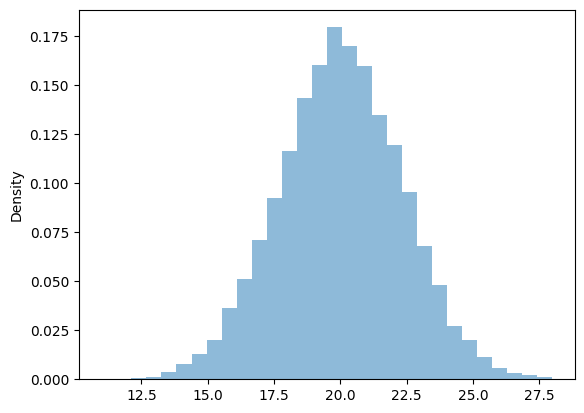

In [10]:
plt.clf()
xmean.plot()
plt.show()

### 2.2.2 **CHALLENGE**

- A) **CALCULATE THE MEAN AND STANDARD DEVIATION OF THE xmean VARIABLE. HOW SIMILAR OR DIFFERENT ARE THESE VALUES FROM THE MEAN AND STANDARD DEVIATION OF x?**

In [14]:
mean_of_xmean = xmean.mean()
xmean_std = xmean.sd()
print("Mean of xmean: ", mean_of_xmean, "\nStandard Deviation of xmean: ", xmean_std)


Mean of xmean:  20.00708101931597 
Standard Deviation of xmean:  2.3154377179968457


*CON LOS VALORES DE XMEAN Y LA DESVIACION ESTANDAR DE XMEAN, NOS PODEMOS DAR CUENTA QUE EL MEAN NO CAMBIA MUCHO A LOS VALORES DE X. SIN EMBARGO, CUANDO MIRAMOS EL VALOR DE LA DESVIACION ESTANDAR DE XMEAN CON RESPECTO A LA X, SI VARIA DE MANERA DRASTICA.*

- B) **WHAT DO YOU SEE IN THE ABOVE HISTOGRAM? DOES THE HISTOGRAM OF SAMPLE MEANS OF UNIFORM RANDOM VARIABLE LOOK LIKE A UNIFORM DISTRIBUTED VARIABLE? DO YOU SEE A LOGIC? BRIEFLY EXPLAIN WHAT YOU THINK**

*EN EL HISTOGRAMA QUE ESTA ARRIBA PODEMOS OBBSERVAR COMO SE PRESENTAN LOS VALOR DE XMEAN COMO UNA CAMPANA DE GAUSS. CON ESTO PODEMOS OBSERVAR QUE LOS VALORES DE X TIENDEN A AGRUPARSE ALREDEDOR DE UN VALOR CENTRAL, EN ESTE CASO SIENDO ALREDEDOR DE 20*

**Now plot both variables in the same plot; the original x uniform variable and the xsample variable (the sample means of x).**

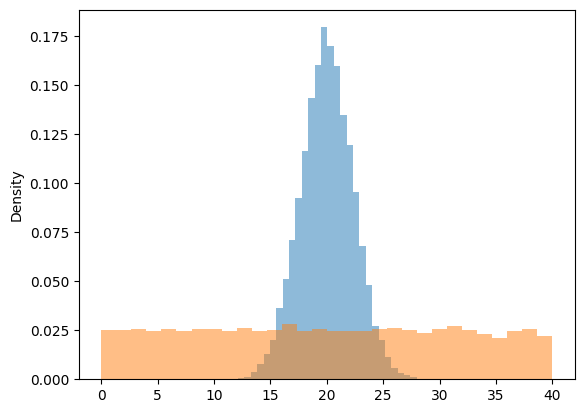

In [21]:
plt.clf()
xmean.plot()
x.plot()
plt.show()

- C) **WHAT DO YOU SEE? HOW THE HISTOGRAM OF X DIFFERS FROM THE HISTOGRAM OF THE SAMPLES OF X?**

*EN EL HISTOGRAMA PODEMOS OBSERVAR LA CAMPANA DE GAUSS QUE SE CREA AL GRAFICAR EL MEAN DE X, Y TAMBIEN EN COLOR NARANJA PODEMOS OBSERVAR EL SET DE DATOS ALEATORIOS DEL 0 AL 40 Y LA DENSIDAD QUE ESTOS NUMEROS TIENEN.*

### 2.2.4 **Simulating Numbers with the NORMAL probability distribution**

Let’s simulate a normal distributed variable Y with mean = 20 and standard devation = 10.

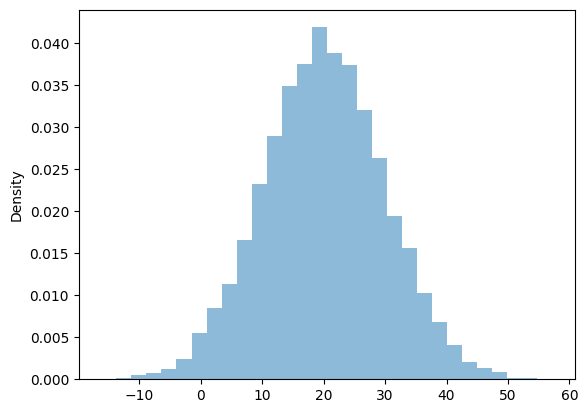

In [27]:
# clear the plot space:
plt.clf()
# Define the probability type of function as uniform (probability space)
P = Normal(mean=20, sd=10)
# Define Y as a random variable of the type P (normal)
Y =RV(P)
# Simulate 10,000 values of Y and save the in the x array: 
y=Y.sim(10000)
y.plot()
plt.show()

### 2.2.5 **CHALLENGE**

**- A) CALCULATE THE MEAN AND STANDARD DEVIATION OF THIS RANDOM y VARIABLE. HOW SIMILAR OR DIFFERENT ARE THESE VALUES FROM THE MEAN AND STANDARD DEVIATION OF THE THEORETICAL MEAN (20) AND THE THEORETICAL STANDARD DEVIATION (10)?**

In [33]:
y_mean = y.mean()
y_std = y.sd()

theoretical_ymean = 20
theoretical_ystd = 10

print("Y mean: ", y_mean, "\nY STD: ", y_std)
print("Diferencia mean: ", abs(y_mean - theoretical_ymean), "\nDiferencia std: ", abs(y_std - theoretical_ystd))

Y mean:  20.038343613664807 
Y STD:  9.840710676327724
Diferencia mean:  0.03834361366480721 
Diferencia std:  0.15928932367227588


*PODEMOS OBSERVAR OBSERVAR QUE LOS VALORES TEORETICOS SON CASI IGUALES A LOS OBTENIDOS. TENIENDO SOLO UNA DIFERENCIA DE 0.038 EN EL MEAN Y 0.159 EN LA DESVIACION ESTANDAR*

- **B)WHAT DO YOU SEE? INTERPRET THE HISTOGRAM WITH YOUR WORDS.**
  
Now generate 10,000 groups of 25 NORMAL random variables with mean=20 and SD=10. You will end up with a matrix of 10,000 rows and 25 columns:

In [34]:
# Define the probability space P as a vector of 25 normal random numbers:
P = Normal(mean=20, sd=10) ** 25
# Define RANDOMVECTOR as a vector of 25 random variables in the Probability space P 
RANDOMVECTOR = RV(P)
# Simulate 10,000 random vectors with this distribution and save the in ymatrix: 
ymatrix=RANDOMVECTOR.sim(10000)

Now ymatrix will have 10,000 rows and 25 columns of NORMAL random numbers with mean=20 and SD=10

In [35]:
ymatrix

0,"(9.890753829557912, 24.890196549659166, 9.491549448313242, -3.0427693371155193, 18.173413108158563, ..."
1,"(40.3772677650405, 16.557049985686664, 23.862139625532336, -4.177683101136967, 37.52692180702404, ....."
2,"(7.195970279216763, 5.2351854797684805, 15.019453096488048, 15.600763756426389, 17.83253265350488, ...."
3,"(21.59586229263496, 41.20316058139404, 15.741545740712837, 13.171007948872617, 14.98585773793054, ....."
4,"(9.765187345681497, 10.924208649363647, 23.435638921368977, 30.154061552734625, 17.489210376943284, ..."
5,"(21.631889544930754, 34.987286526996364, 36.63405366880124, 22.648030651526405, 21.179800352870505, ..."
6,"(26.40901296635508, 12.826894414925873, 28.764431351248128, 11.770285235052338, 33.3127995366328, ....."
7,"(20.004639329432315, 32.11666243118931, 19.752204157298255, 15.22666701702235, 23.739924904539237, ...."
8,"(-8.888720023311315, 20.386784337790818, 27.768689012741802, 34.51506477254431, 21.35852338778323, ...."
...,...
9999,"(16.504378134559403, 29.67192291703992, 21.784357857484324, 19.259688040852126, 51.83388891672754, ...."


Now we get the mean of each vector (row) to get 10,000 sample means:

In [39]:
# The 2nd parameter is the mathematical operation applied to each row of the random vector
# Simulate 10,000 means of each random vector of 25 uniform distributed numbers: 
ymean = RV(P,mean).sim(10000)
ymean

0,21.03067772628445
1,17.900759222533384
2,20.68187500930012
3,18.228822049420664
4,21.12136539622247
5,17.969646364806568
6,21.90637704792261
7,24.033386827322587
8,19.037921808056595
...,...
9999,20.725424502219603


Now do a histogram of these sample means of Y.

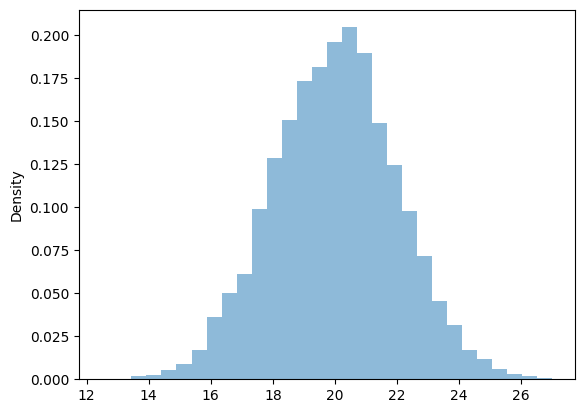

In [37]:
plt.clf()
ymean.plot()
plt.show()

*EN EL HISTOGRAMA DE LOS VALORES DE Y, PODEMOS OBSERVAR UNA CAMPANA DE GAUSS LA CAUL NOS MUESTRA DONDE TIENDEN A AGRUPARSE LOS VALORES, QUE EN ESTE CASO ES ALREDEDOR DE UN VALOR CENTRAL QUE ES APROXIMADAMENTE 20*

### **2.2.6 CHALLENGE**

- **A) CALCULATE THE MEAN AND STANDARD DEVIATION OF THE ymean VARIABLE. HOW SIMILAR OR DIFFERENT ARE THESE VALUES FROM THE MEAN AND STANDARD DEVIATION OF y?**

In [41]:
mean_of_ymean = ymean.mean()
mean_of_ystd = ymean.sd()
print("MEAN OF ymean: ", mean_of_ymean, "\nSTD of ystd: ", mean_of_ystd)

MEAN OF ymean:  20.018499127878798 
STD of ystd:  2.0043917052622424


*EL VALOR DEL MEAN SE MANTIENE CASI IGUAL, SIN EMBARGO EL VALOR DE LA DESVIACION ESTANDAR SI VARIA MUCHO MAS SIENDO EL DE LA DESVIACION ESTANDAR DE YMEAN, MUCHO MENOR*

- **B) INTERPRET THE ABOVE HISTOGRAM OF THE SAMPLES OF y**

Now plot both histograms, the histogram of y and the histogram of ymean:

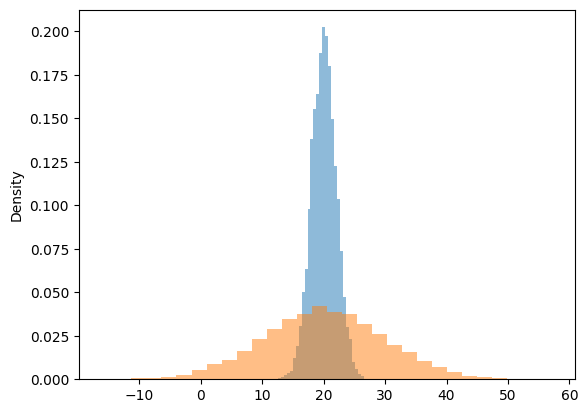

In [42]:
plt.clf()
ymean.plot()
y.plot()
plt.show()

*EN EL HISTOGRAMA PODEMOS OBSERVAR LOS DATOS DE Y Y EL MEAN DE Y. PODEMOS OBSERVAR COMO SE FORMA UNA CAMPANA DE GAUSS INDICANDONOS QUE LOS DATOS TIENDEN A AGRUPARSE EN UN VALOR CENTRAL, EN ESTE CASO 20*

- **C) WHAT DO YOU SEE? COMPARE BOTH HISTOGRAMS. BRIEFLY EXPLAIN WHAT YOU THINK THAT HAPPEND.**

*PODEMOS OBSERVAR AMBOS HISTOGRAMAS Y VER COMO EN EL PRIMER HISTOGRAMA TENEMOS LOS DATOS DE Y Y SU DENSIDAD. PODEMOS VER QUE LOS VALORES QUE TIENE LA VARIABLE Y SON PARA QUE EL PROMEDIO SEA 20. MIENTRAS QUE EN EL SEGUNDO HISTOGRAMA PODEMOS OBSERVAR COMO EL PROMEDIO TIENDE A TENER UN VALOR DE 20, ESTO LO PODEMOS OBSEVAR CON LA CAMPANA DE GAUSS QUE SE CREA*

### **4.1 CHALLENGE**

Collect real data for Microsoft (MSFT) stock and do a hypothesis testing to see whether the mean of monthly cc returns of Microsoft is greater than zero.

You have to do the following:

Run a t-test to compare whether the mean return of MSFT is greater than zero.

To do a hypothesis test, we usually do the following steps:



**DEFINE THE VARIABLE OF STUDY. In this case it will be the mean of MSFT cc returns**

In [75]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf

MSFT = yf.download(tickers="MSFT", start="2017-01-01",interval="1d")
MSFT.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.254700,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.998524,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.998524,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.492573,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.309593,20382700


**WRITE THE NULL AND THE ALTERNATIVE HYPOTHESIS.**

MEAN:  0.0010298322071570806 
STD:  0.0181698714078041


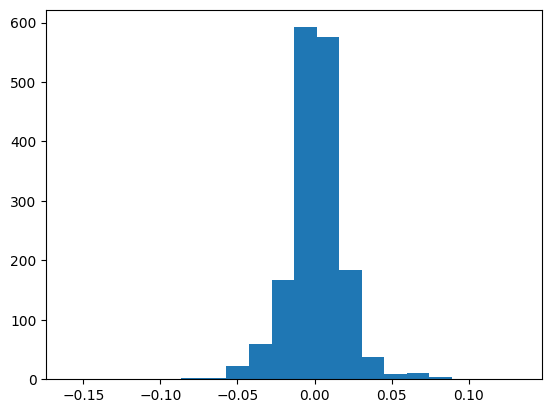

In [79]:
#H0: The Null Hypothesis
MSFT['r'] = np.log(MSFT['Adj Close']) - np.log(MSFT['Adj Close'].shift(1))
plt.hist(MSFT['r'], bins=20)


mean = MSFT['r'].mean()
std = MSFT['r'].std()

print("MEAN: ", mean, "\nSTD: ", std)

plt.show()

**CALCULATE THE STANDARD ERROR, WHICH IS THE STANDARD DEVIATION OF THE VARIABLE OF STUDY.**

In [80]:
std_grouped = std/np.sqrt(MSFT['r'].count())
std_grouped

0.0004451581769513898

**CALCULATE THE t-statistic (t-value). EXPLAIN/INTERPRET THE t-statistic.**

In [83]:
t_statistic = (mean-0) / std_grouped
print("T-Statistic: ", t_statistic)

T-Statistic:  2.3134073695102217


**CALCULATE THE 95% CONFIDENCE INTERVAL OF THE SAMPLE MEAN**

In [84]:
min_t = mean - (2 * std_grouped)
max_t = mean + (2 * std_grouped)
print("MIN T: ", min_t,"\nMAX T: ", max_t)

MIN T:  0.00013951585325430098 
MAX T:  0.0019201485610598602


**WRITE YOUR CONCLUSION OF THE t-TEST**